In [7]:
import keras
import matplotlib.pyplot as plt
import os
import cv2 
import numpy as np
import random
from keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split

# import data

In [8]:

categories = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
img_size = 64

In [9]:
data_path = "Downloads/archive/leapGestRecog/leapGestRecog"

image_data = []

for dr in os.listdir(data_path):
    for class_index, category in enumerate(categories):
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (img_size, img_size)), class_index])
            except Exception as e:
                print(e)

In [13]:
print(image_data[0])

[array([[5, 6, 4, ..., 3, 4, 4],
       [4, 5, 6, ..., 3, 4, 2],
       [4, 6, 4, ..., 2, 3, 4],
       ...,
       [5, 6, 6, ..., 8, 6, 5],
       [5, 5, 4, ..., 5, 5, 5],
       [4, 6, 5, ..., 4, 5, 4]], dtype=uint8), 0]


In [14]:
random.shuffle(image_data)


In [15]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [16]:

label[:10]

[5, 5, 2, 4, 3, 6, 8, 3, 8, 8]

# Data Visualising

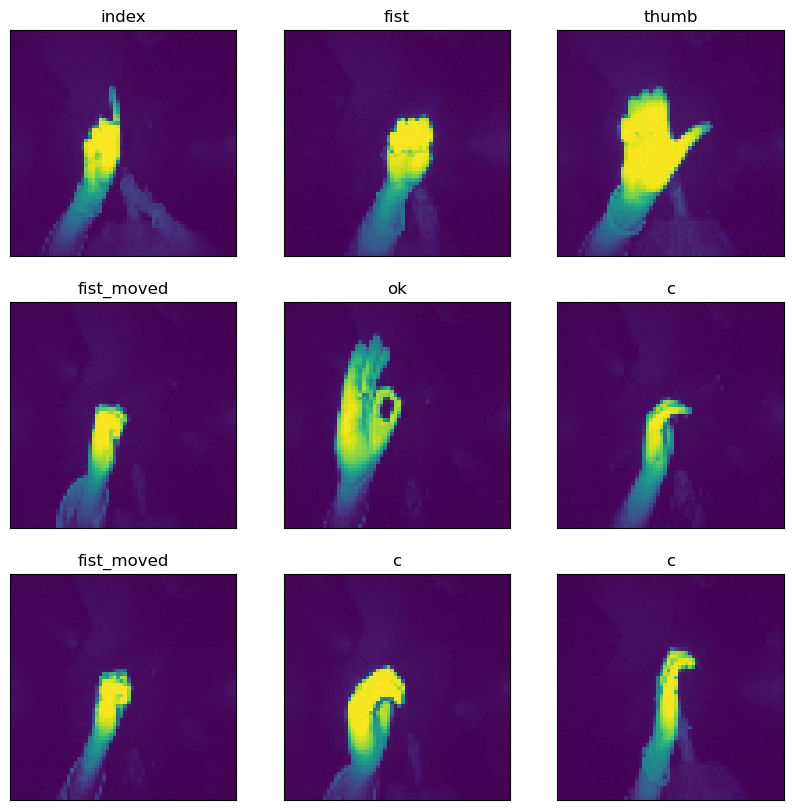

In [17]:
plt.figure(1, figsize = (10,10))

for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(input_data[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(categories[label[i]][3:])
    
plt.show()

# Normalizing Data

In [18]:
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 64, 64)

# Train-Test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state = 0)

# Model

In [20]:
model = keras.models.Sequential([
    Input(shape = (img_size, img_size, 1)),
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'),
    
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'),
    MaxPool2D(pool_size = (2, 2)),
    Dropout(0.3),

    Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    MaxPool2D(pool_size = (2, 2)),
    Dropout(0.3),

    Flatten(),

    Dense(256, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# model.summary()

In [22]:

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

# Model training and accuracy

In [23]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 43s 94ms/step - accuracy: 0.7305 - loss: 0.7907 - val_accuracy: 0.9988 - val_loss: 0.0043
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 40s 92ms/step - accuracy: 0.9961 - loss: 0.0121 - val_accuracy: 0.9905 - val_loss: 0.0354
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 39s 89ms/step - accuracy: 0.9978 - loss: 0.0065 - val_accuracy: 0.9995 - val_loss: 0.0016
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 39s 89ms/step - accuracy: 0.9988 - loss: 0.0041 - val_accuracy: 0.9998 - val_loss: 4.4450e-04
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 39s 89ms/step - accuracy: 0.9996 - loss: 8.9122e-04 - val_accuracy: 0.9997 - val_loss: 6.9217e-04
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 39s 89ms/step - accuracy: 0.9990 - loss: 0.0034 - val_accuracy: 0.9988 - val_loss: 0.0026
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 39s 90ms/step - accuracy: 0.9998 - loss: 4.3496e-04 - val_accuracy: 0.9998 - val_loss: 5.4225e-04
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 39s 89ms/step - accuracy: 0.99

# Saving the model

In [26]:
model.save('hand_gesture.keras')
